In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/retail-data/new_retail_data.csv


In [50]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emmanuelfwerr/london-weather-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/london-weather-data


In [51]:
df=pd.read_csv('/kaggle/input/london-weather-data/london_weather.csv')

In [52]:
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [55]:
df.isna().sum()

date                   0
cloud_cover           19
sunshine               0
global_radiation      19
max_temp               6
mean_temp             36
min_temp               2
precipitation          6
pressure               4
snow_depth          1441
dtype: int64

In [56]:

# Drop rows with any missing values
df= df.dropna()


In [57]:
df.isna().sum()

date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64

## Principal Component Analysis

#### Normalisation

In [58]:
import pandas as pd


pd.set_option('display.max_columns', None)

# Display the first few rows of the DataFrame
print(df.head(30))

        date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0   19790101          2.0       7.0              52.0       2.3       -4.1   
1   19790102          6.0       1.7              27.0       1.6       -2.6   
2   19790103          5.0       0.0              13.0       1.3       -2.8   
3   19790104          8.0       0.0              13.0      -0.3       -2.6   
4   19790105          6.0       2.0              29.0       5.6       -0.8   
5   19790106          5.0       3.8              39.0       8.3       -0.5   
6   19790107          8.0       0.0              13.0       8.5        1.5   
7   19790108          8.0       0.1              15.0       5.8        6.9   
8   19790109          4.0       5.8              50.0       5.2        3.7   
9   19790110          7.0       1.9              30.0       4.9        3.3   
10  19790111          1.0       6.8              55.0       2.9        2.6   
11  19790112          3.0       6.4              54.0       2.0 

In [62]:
unnormalized_columns =list(df.columns)
unnormalized_columns

['date',
 'cloud_cover',
 'sunshine',
 'global_radiation',
 'max_temp',
 'mean_temp',
 'min_temp',
 'precipitation',
 'pressure',
 'snow_depth']

In [63]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[unnormalized_columns])



In [64]:
X=np.array(df_standardized)

In [65]:
X.shape

(13843, 10)

In [66]:
X=np.array(X)

#### Covariance

In [67]:
cov_matrix = np.cov(X, rowvar=False)

In [68]:
from numpy.linalg import eig
(valeurs_propres,vecteurs_propres)=eig(cov_matrix)
valeurs_propres.shape

(10,)

In [69]:
pourcentage_information=(valeurs_propres / valeurs_propres.sum())*100
pourcentage_information

array([37.92565186, 19.57047712, 10.39573877, 10.72236915,  9.25157903,
        6.53787108,  3.26490779,  1.50979462,  0.66224865,  0.15936194])

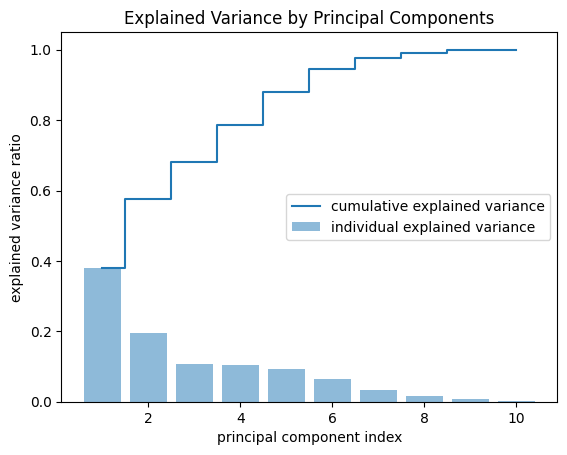

In [70]:
import matplotlib.pyplot as plt
tot = sum(valeurs_propres)

# Computing the explained variance for each principal component
var_exp = [i / tot for i in sorted(valeurs_propres, reverse=True)]

# Calculating the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# Plotting the explained variance
plt.bar(range(1, len(var_exp) + 1), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('explained variance ratio')
plt.xlabel('principal component index')
plt.legend(loc='best')
plt.title('Explained Variance by Principal Components')
plt.show()
